In [4]:
%matplotlib inline

In [5]:
import mpl_plot_templates

In [13]:
x = np.random.randn(10000)
y = np.random.randn(10000)

In [14]:
import pylab as pl

/Users/adam/anaconda/envs/astropy35/lib/python3.5/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Users/adam/anaconda/envs/astropy35/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


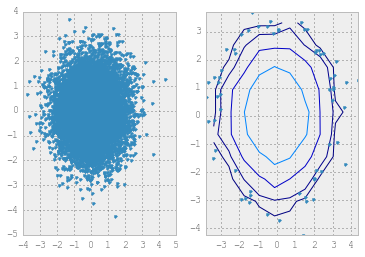

In [18]:
fig = pl.figure(1)
pl.subplot(1,2,1, rasterized=True)
pl.plot(x,y,'.')
pl.subplot(1,2,2)
rslt = mpl_plot_templates.adaptive_param_plot(x, y)
fig.savefig('rasterized.pdf')

/Users/adam/anaconda/envs/astropy35/lib/python3.5/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Users/adam/anaconda/envs/astropy35/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


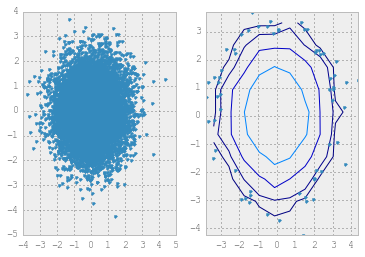

In [19]:
fig = pl.figure(1)
pl.subplot(1,2,1, rasterized=False)
pl.plot(x,y,'.')
pl.subplot(1,2,2)
rslt = mpl_plot_templates.adaptive_param_plot(x, y)
fig.savefig('not_rasterized.pdf')

In [21]:
%%bash
# non-rasterized files are somewhat larger
ls -lh *raster*
open *raster*pdf

-rw-r--r--+ 1 adam staff 159K Jan 25 14:35 not_rasterized.pdf
-rw-r--r--+ 1 adam staff  18K Jan 25 14:35 rasterized.pdf


## SSH continued ##

Cool tips courtesy Felix Stoehr:

1) It is possible to set chained alias, so that a one-step login can be
done. Adding the following to the .ssh/config file on the laptop/at home

    --------------------------------------------------------
    # http://blogs.perl.org/users/smylers/2011/08/ssh-productivity-tips.html
    ControlMaster auto
    ControlPath /tmp/ssh_mux_%h_%p_%r

    Host esosshgateway
      HostName ssh.eso.org
      User USERNAME
      ForwardAgent yes

    Host eso
      HostName pc0XXXXX.ads.eso.org
      ProxyCommand ssh esosshgateway -W %h:%p
      User USERNAME

    ForwardX11 yes
    -------------------------------------------------
Where ``pc0XXXXXX`` is the name of the ESO desktop computer and ``USERNAME``
one's username (e.g. ``fheissen``).

That allows to do e.g.

    scp thisfile.txt eso:

It however allows to do something even better:

2) It is possible to mount the ESO directory onto the laptop/home computer

A script called e.g. "esomount" containing

    mkdir eso
    sshfs eso: eso
    echo "to unmount run esoumount"

mounts the directory to the "eso" subdirectory in the laptop's/home
computers disk. File transfer between two computers can be done extemely
easily without having to reenter the password all the time, or by
copying in two steps.

A script called e.g. "esoumount" containing 

    fusermount -u eso; rmdir eso

then removes the mount point again.

This uses [sshfs](https://github.com/libfuse/sshfs)

Comment from Ruud: I installed 'sshfs' through macports, which also
installs 'osxfuse', but not 'fusermount'. Trying to compile 'osxfuse'
from the GitHub source led to missing library errors. These still weren't
fixed half an hour later, so I went looking for alternatives. This seems to
work fine for unmounting:

    umount eso; rmdir eso

3) VPN is nice, but it might be that someone wants to access the actual
   stuff they have been working with on their desktop. That's where VNC
   comes in and also that can be done completely securely over ssh.

A) First start the vnc server over ssh

    ssh -Y -t -L 5900:localhost:5900 USERNAME@ssh.eso.org "ssh -Y -t -L
    5900:localhost:5900 USERNAME@pc0XXXXXX.ads.eso.org 'x11vnc -localhost -
    display :0 -usepw' "
    
left # is local, right # is remote
5900 -> :0
5901 -> :1
etc.

B) Then on the local machine do

    vncviewer -encodings "copyrect tight zrle hextile" localhost:0

Or on a Mac use e.g. "chicken of the vnc".

If the password file ``~/.vnc/passwd`` does not yet exist, the first running
of x11vnc will ask for a password and write a hashed version of it to
that file.

The F8 key is very useful when running x11vnc.

These three tricks allow me at least to seamlessly work from the laptop
or from home completely encrypted and safe on my ESO desktop. I find
this extremely convenient and efficient. I like it much better than
using screen.

I can start jobs on the processing cluster, work on documents etc,
without having to sync the files all the time. If I need to sync the
files, I can just mount the ESO home directory on the laptop and copy
files in both directions.


Also:

https://code.google.com/p/pdsh/

    pdsh -R ssh -w fstoehr@arcp[1-9] ls -al .bashrc

### Eric's answer to Eric's question from last week ###
How can I check on the stats of all machines?

    #!/usr/bin/sh 
    # 
    # 
    # Check CPU/RAM/Disk information. 
    # Version 1.5.2 

    for i in `cat server-list` 
        do 
        ssh eemselle@$i "echo '=======================';hostname;echo '=======================';echo 'CPU Information:';echo '-----------------';cat /proc/cpuinfo | grep 'model name'|sed 's/model name/CPU/g';echo '-----------------';echo 'Memory Information:';echo '-----------------';cat /proc/meminfo | grep 'MemTotal'|sed 's/MemTotal/RAM/g';echo '-----------------';echo 'Disk information:';echo '-----------------';df -h | grep scratch;echo '-----------------';echo 'OS information:';echo '-----------------';lsb_release -a | grep 'ID'|sed 's/Distributor ID://g';lsb_release -a | grep 'Release'|sed 's/Release://g'" 
    done


pdsh can make this easier


## Authorized Keys ##

Use authorized keys to avoid entering your password multiple times.

If you don't have a file ``~/.ssh/id_rsa.pub``, make one using ``ssh-keygen``.  Then, copy the contents of ``~/.ssh/id_rsa.pub`` and put them on a blank line in ``~/.ssh/authorized_keys`` on any remote machine you want to ssh to.  If there is no ``authorized_keys`` file, you can just make one with that path (``~/.ssh/authorized_keys``).

In principle, ``authorized_keys`` in a shared directory should allow you to ssh between machines that share the directory.

## Plotting: tight_layout ##

Is it possible to use tight_layout but keep the figures in a fixed position?

   - probably not

# Note about ssh.eso.org gateway #

   If you can't access the gateway (ssh.eso.org), e-mail the helpdesk to get your username access to the gateway.